<a href="https://colab.research.google.com/github/sandalis05/MIT-FutureMakers/blob/main/Intro%20to%20CNNs/MNIST_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

import warnings
# filter warnings
warnings.filterwarnings('ignore')

import os

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
print("Y Train (first 5 values):", y_train[:5])

Y Train (first 5 values): [5 0 4 1 9]


In [ ]:
print("Y Test (first 5 values):", y_test[:5])

Y Test (first 5 values): [7 2 1 0 4]


Text(0.5, 1.0, 'Number of digit classes')

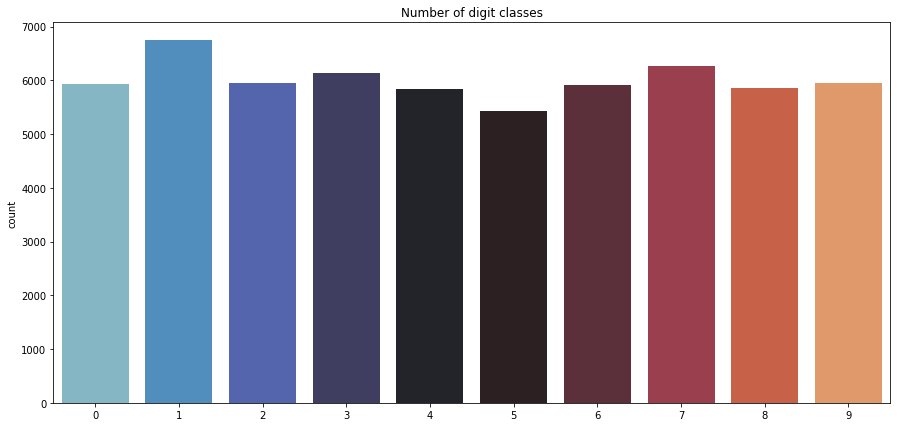

In [ ]:
# visualize number of digits classes
plt.figure(figsize=(15,7))
g = sns.countplot(y_train, palette="icefire")
plt.title("Number of digit classes")
#y_train.value_counts()

In [ ]:
# Label Encoding 
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
y_train = to_categorical(y_train, num_classes = 10)

In [ ]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0
print("x_train shape: ",X_train.shape)
print("x_test shape: ",X_test.shape)

x_train shape:  (60000, 28, 28)
x_test shape:  (10000, 28, 28)


In [ ]:
# Reshape
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",X_test.shape)

x_train shape:  (60000, 28, 28, 1)
test shape:  (10000, 28, 28, 1)


In [ ]:
# Use one hot encoding to transform the labels to data that the model can understand
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

# Define the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [ ]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

epochs = 20
batch_size = 250

In [ ]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [ ]:
history = model.fit(
  datagen.flow(X_train, y_train, batch_size=250),
  epochs=20,
  validation_data=(X_test, y_test)
)

Epoch 1/20
240/240 [==============================] - 64s 196ms/step - loss: 2.3018 - accuracy: 0.1106 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/20
240/240 [==============================] - 46s 191ms/step - loss: 2.3013 - accuracy: 0.1118 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 3/20
240/240 [==============================] - 46s 191ms/step - loss: 2.3015 - accuracy: 0.1115 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/20
240/240 [==============================] - 46s 193ms/step - loss: 2.3011 - accuracy: 0.1125 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/20
240/240 [==============================] - 46s 193ms/step - loss: 2.3016 - accuracy: 0.1118 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/20
240/240 [==============================] - 47s 194ms/step - loss: 2.3013 - accuracy: 0.1130 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 7/20
240/240 [==============================] - 47s 195ms/step - loss: 2.3014 - accuracy: 0.1109 - val_loss: 2.3010 - val_ac

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 8)         208       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)              

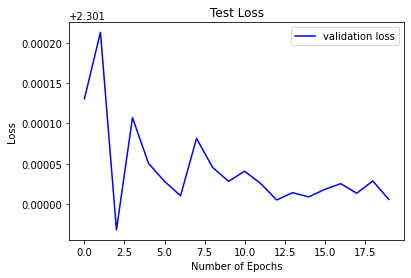

In [44]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

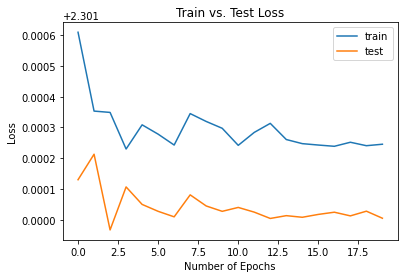

In [47]:
plt.title("Train vs. Test Loss")
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend();
plt.show()

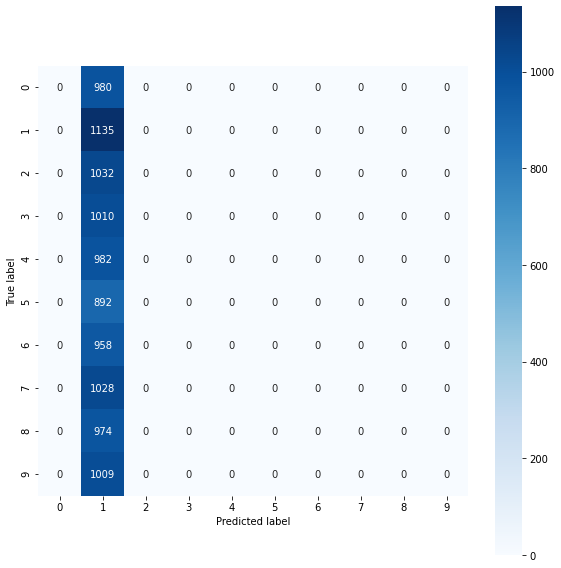

In [51]:
# confusion matrix
y_pred = np.argmax(model.predict(X_test), axis=-1)

y_test_round = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_round, y_pred)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, square=True, fmt="")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()